PROJECT 2 : 모두카페 운영 전략 제시
========

## import 및 기본 데이터 세팅

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
entry_data = pd.read_csv('./data/entry_data.csv')
sales_data = pd.read_csv('./data/sales_data.csv')
item_data = pd.read_csv('./data/item_data.csv')
item_entry_data = pd.read_csv('./data/item_entry_data.csv')

In [4]:
entry_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [5]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [6]:
item_data.head(60)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
5,6,디저트,치즈케이크,"4,000원"
6,7,디저트,블루베리머핀,"3,500원"
7,8,디저트,쿠키(오트밀),"1,500원"
8,9,디저트,크로플,"5,500원"
9,10,디저트,치즈케이크,"1,500원"


In [7]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


## 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)

월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
힌트: groupby() 함수를 사용하세요.

In [8]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [9]:
temp_var = sales_data

### 날짜 월별로 만들기

In [86]:
temp_var['결제일시'] =  temp_var['결제일시'].str[:7]
temp_var['결제일시']
# temp_var
# https://hleecaster.com/pandas-data-cleaning-2/

0       2022-04
1       2022-04
2       2022-04
3       2022-04
4       2022-04
         ...   
7100    2021-02
7101    2021-02
7102    2021-02
7103    2021-02
7104    2021-02
Name: 결제일시, Length: 7105, dtype: object

### 금액에서 쉼표 제거 및 숫자로 전환

In [11]:
#콤마 없애기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','').astype('int64')
# https://rfriend.tistory.com/463
sales_data['결제금액']

0       4500
1       5500
2       4000
3       1000
4       5000
        ... 
7100   -3500
7101    4500
7102   -4500
7103    4000
7104   -4000
Name: 결제금액, Length: 7105, dtype: int64

In [12]:
temp_var[['결제일시', '결제금액']]

,결제일시,결제금액
0,2022-04,4500
1,2022-04,5500
2,2022-04,4000
3,2022-04,1000
4,2022-04,5000
...,...,...
7100,2021-02,-3500
7101,2021-02,4500
7102,2021-02,-4500
7103,2021-02,4000


### 월별로 묶음

In [13]:
temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()
# https://ponyozzang.tistory.com/291

,결제금액
결제일시,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


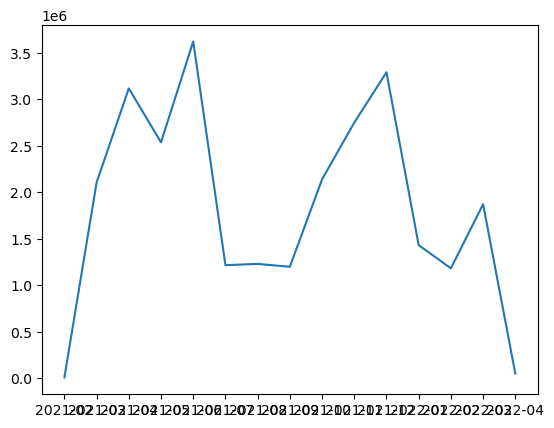

In [14]:
plt.plot(temp_var[['결제일시', '결제금액']].groupby('결제일시').sum())
plt.show()

In [15]:
temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()


,결제금액
결제일시,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


In [16]:
a = temp_var[['결제일시', '결제금액']].groupby('결제일시').sum()
a
a['결제금액']

결제일시
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

## 필수문제1 결과

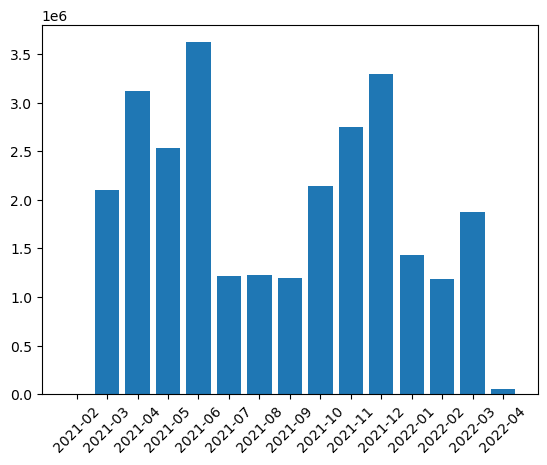

In [17]:
plt.bar(a.index, a['결제금액'])
plt.xticks(rotation=45)
plt.show()
# https://cosmosproject.tistory.com/418

## 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [18]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507
1,2022-04,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507
2,2022-04,선불기1,라면,신용카드,결제완료,1,4000,customer275507
3,2022-04,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507
4,2022-04,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN
7101,2021-02,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN
7102,2021-02,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN
7103,2021-02,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN


In [19]:
sales_data[['상품명', '판매수량', '결제금액']]

,상품명,판매수량,결제금액
0,치킨카라아케 6pc,1,4500
1,짜장라면(계란추가),1,5500
2,라면,1,4000
3,비엔나소세지(토핑),1,1000
4,라면(계란/치즈추가),1,5000
...,...,...,...
7100,아메리카노(HOT),-1,-3500
7101,카페모카(HOT),1,4500
7102,카페모카(HOT),-1,-4500
7103,카페라떼(HOT),1,4000


In [20]:
sales_data[['상품명', '판매수량', '결제금액']].groupby('상품명').sum()


,판매수량,결제금액
상품명,,
(면)계란추가-국물라면,10,5000
(면)계란후라이 추가-불닭/짜장,20,20000
(면)치즈추가,21,10500
(밥)계란후라이 추가,3,3000
(밥)슈레드치즈추가,3,4500
...,...,...
한돈간장불고기덮밥,15,112500
한돈고추장불고기덮밥,17,127500
허니밀크쉐이크,20,108500


In [21]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()

,판매수량
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,20


In [22]:
sales_data[['상품명', '결제금액']].groupby('상품명').sum()

,결제금액
상품명,
(면)계란추가-국물라면,5000
(면)계란후라이 추가-불닭/짜장,20000
(면)치즈추가,10500
(밥)계란후라이 추가,3000
(밥)슈레드치즈추가,4500
...,...
한돈간장불고기덮밥,112500
한돈고추장불고기덮밥,127500
허니밀크쉐이크,108500


In [23]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()['판매수량'] 

상품명
(면)계란추가-국물라면         10
(면)계란후라이 추가-불닭/짜장    20
(면)치즈추가              21
(밥)계란후라이 추가           3
(밥)슈레드치즈추가            3
                     ..
한돈간장불고기덮밥            15
한돈고추장불고기덮밥           17
허니밀크쉐이크              20
헤이즐넛라떼(HOT)           2
헤이즐넛라떼(ICE)          14
Name: 판매수량, Length: 100, dtype: int64

In [24]:
sales_data[['상품명', '결제금액']].groupby('상품명').sum()['결제금액']

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: 결제금액, Length: 100, dtype: int64

In [25]:
sales_data['매출'] =  (sales_data[['상품명', '판매수량']].groupby('상품명').sum()['판매수량'] + sales_data[['상품명', '결제금액']].groupby('상품명').sum()['결제금액'])
sales_data['매출']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7100   NaN
7101   NaN
7102   NaN
7103   NaN
7104   NaN
Name: 매출, Length: 7105, dtype: float64

위에꺼........실패.. ㅠㅠㅠ

In [26]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum()


,판매수량
상품명,
(면)계란추가-국물라면,10
(면)계란후라이 추가-불닭/짜장,20
(면)치즈추가,21
(밥)계란후라이 추가,3
(밥)슈레드치즈추가,3
...,...
한돈간장불고기덮밥,15
한돈고추장불고기덮밥,17
허니밀크쉐이크,20


In [27]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False)


,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
...,...
라면(계란/치즈추가),1
녹차(HOT),1
짜장라면(계란추가),1


In [28]:
sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


In [29]:
b = sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)

In [30]:
import koreanize_matplotlib

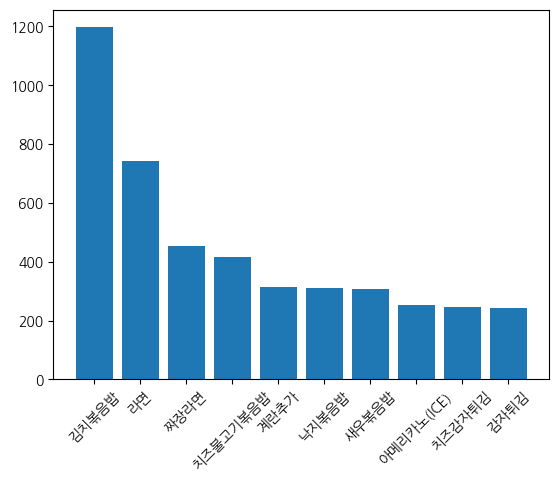

In [31]:
plt.bar(b.index, b['판매수량'])
plt.xticks(rotation=45)
plt.show()

### 판매매출(수*가격)으로 표현해보자! :)

In [32]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [33]:

b = sales_data[['상품명', '판매수량']].groupby('상품명').sum().sort_values(by='판매수량' ,ascending=False).head(10)
b

,판매수량
상품명,
김치볶음밥,1197
라면,742
짜장라면,453
치즈불고기볶음밥,417
계란추가,313
낙지볶음밥,310
새우볶음밥,307
아메리카노(ICE),254
치즈감자튀김,245


In [ ]:
#민제님이 알려주신 코드!!
b.insert(0,'상품명',b.index)
b.reset_index(drop=True, inplace=True)


In [37]:
b.columns

Index(['상품명', '판매수량'], dtype='object')

In [38]:
b

,상품명,판매수량
0,김치볶음밥,1197
1,라면,742
2,짜장라면,453
3,치즈불고기볶음밥,417
4,계란추가,313
5,낙지볶음밥,310
6,새우볶음밥,307
7,아메리카노(ICE),254
8,치즈감자튀김,245
9,감자튀김,242


In [42]:
item_data

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
...,...,...,...,...
169,170,커피,카페모카(ICE),"2,500원"
170,171,커피,헤이즐넛라떼(ICE),"2,500원"
171,172,포장,오늘은 순살닭다리 덮밥,"9,000원"
172,173,포장,오늘은 한돈간장불고기,"8,000원"


In [41]:
sales = pd.merge(b,item_data)
sales

,상품명,판매수량,구분,분류,판매금액
0,김치볶음밥,1197,49,음식,"5,000원"
1,김치볶음밥,1197,63,음식,"5,900원"
2,김치볶음밥,1197,71,음식,"2,500원"
3,김치볶음밥,1197,93,음식,"3,000원"
4,김치볶음밥,1197,100,음식,"4,000원"
5,김치볶음밥,1197,101,음식,"4,800원"
6,라면,742,50,음식,"4,000원"
7,라면,742,81,음식,"1,500원"
8,라면,742,90,음식,"2,000원"
9,라면,742,94,음식,"3,000원"


In [46]:
# 망했음..다시 매출 계산해보겠음.... ㅠㅠ

In [47]:
sales_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,매출
0,2022-04,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,NaN
1,2022-04,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,NaN
2,2022-04,선불기1,라면,신용카드,결제완료,1,4000,customer275507,NaN
3,2022-04,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,NaN
4,2022-04,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,NaN
...,...,...,...,...,...,...,...,...,...
7100,2021-02,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,NaN
7101,2021-02,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,NaN
7102,2021-02,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,NaN
7103,2021-02,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,NaN


0       1
4705    1
4716    1
4715    1
4714    1
       ..
2760   -1
6930   -1
5414   -1
6932   -1
7104   -1
Name: 판매수량, Length: 7105, dtype: int64

In [55]:
# sales_data 에서 상품명으로 그룹바이를 하긴 해야할듯..

c = sales_data[['상품명', '결제금액']].groupby('상품명').sum().sort_values(by='결제금액' ,ascending=False)
c.head(10)

,결제금액
상품명,
김치볶음밥,5971900
라면,2916000
치즈불고기볶음밥,2276100
짜장라면,2032500
낙지볶음밥,1699700
새우볶음밥,1529800
치즈감자튀김,1348700
감자튀김,1083800
아메리카노(ICE),936100


In [62]:
c.insert(0,'상품명',c.index)


ValueError: cannot insert 상품명, already exists

In [63]:
c.reset_index(drop=True, inplace=True)

In [64]:
c

,상품명,결제금액
0,김치볶음밥,5971900
1,라면,2916000
2,치즈불고기볶음밥,2276100
3,짜장라면,2032500
4,낙지볶음밥,1699700
...,...,...
95,비엔나소세지(토핑),3000
96,이어폰(커널형),3000
97,시럽추가,2500
98,(밥)체다치즈추가,2000


In [66]:
c.head(20)

,상품명,결제금액
0,김치볶음밥,5971900
1,라면,2916000
2,치즈불고기볶음밥,2276100
3,짜장라면,2032500
4,낙지볶음밥,1699700
5,새우볶음밥,1529800
6,치즈감자튀김,1348700
7,감자튀김,1083800
8,아메리카노(ICE),936100
9,불닭볶음면,688500


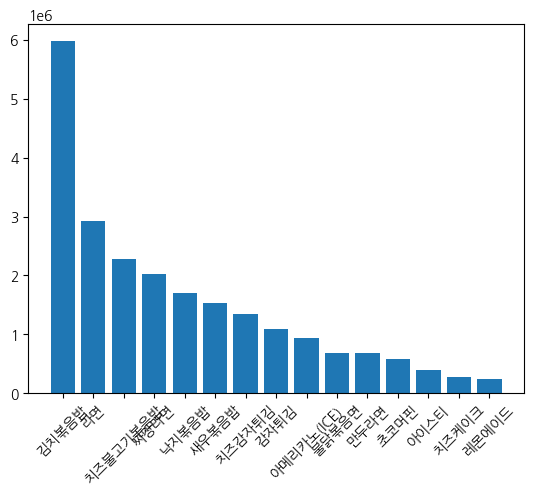

In [71]:
plt.bar(c['상품명'].head(15), c['결제금액'].head(15))
plt.xticks(rotation=45)
plt.show()

## 필수문제2 결과

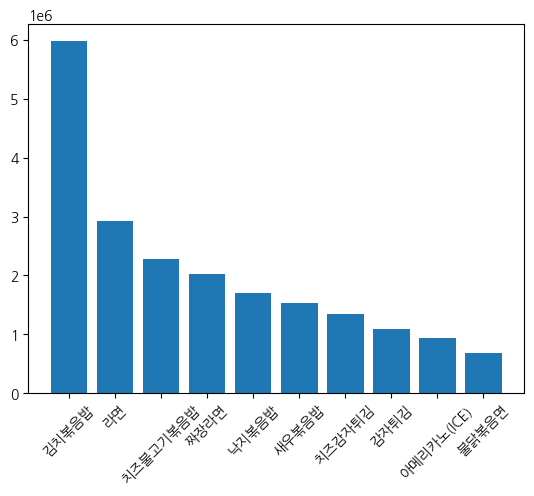

In [78]:
plt.bar(c['상품명'].head(10), c['결제금액'].head(10))
plt.xticks(rotation=45)
plt.show()

## 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
힌트: value_counts() 함수를 사용하세요.

In [116]:
#입장권 관련 데이터
entry_data.head(240)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
235,심야-조조무제한,2022-03-27 22:48,2022-03-28 1:09,오전 2:21:00,선불기2,6000,퇴실,customer477453
236,심야-조조무제한,2022-03-27 22:16,2022-03-28 1:08,오전 2:52:00,선불기2,6000,퇴실,customer296454
237,기간권,2022-03-27 21:59,2022-03-27 22:00,오전 12:01:00,선불기2,0,퇴실,customer396031
238,한국대생 무제한 입장권,2022-03-27 21:28,2022-03-28 1:17,오전 3:49:00,선불기2,8400,퇴실,customer241606


In [83]:
item_entry_data

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


In [87]:
entry_data.groupby('요금제명').sum()

,금액
요금제명,
18시이후 무제한,1330500
1시간,90000
1시간 요금제,14000
3시간,21000
기간권,0
무제한 입장권,1568600
무제한(일반요금),6000
무제한(한국대생),14000
시간 요금제(1시간당),25000


In [88]:
entry_data.groupby('요금제명').sum().sort_values(by='금액' ,ascending=False)

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


In [89]:
d = entry_data.groupby('요금제명').sum().sort_values(by='금액' ,ascending=False)

In [90]:
d.head(10)

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


In [92]:
d.insert(0,'요금제명',d.index)

In [94]:
d.reset_index(drop=True, inplace=True)

In [95]:
d

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


In [100]:
# e = pd.merge(item_entry_data, d)
item_entry_data


,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


상품 가격과 마찬가지로 요금제에 가격만 다를 뿐 데이터 상 똑같은 항목들이 많아서..

merge가 의미없네요.. ㅠㅠ 칼럼 이름이 다른건 통일 시킬 수 있겠지만..그래봤자네요 ㅠㅠ 머지 실패..

In [112]:
d.head(20)

,요금제명,금액
0,한국대생 입장권(종일권),70037000
1,입장권(종일권),23570500
2,심야-조조무제한(06시까지),11600000
3,심야-조조무제한,6221000
4,한국대생 무제한 입장권,5207500
5,시간요금제(1시간),2665500
6,시간요금제(3시간),2042000
7,무제한 입장권,1568600
8,18시이후 무제한,1330500
9,조조무제한,693000


## 필수문제3 결과

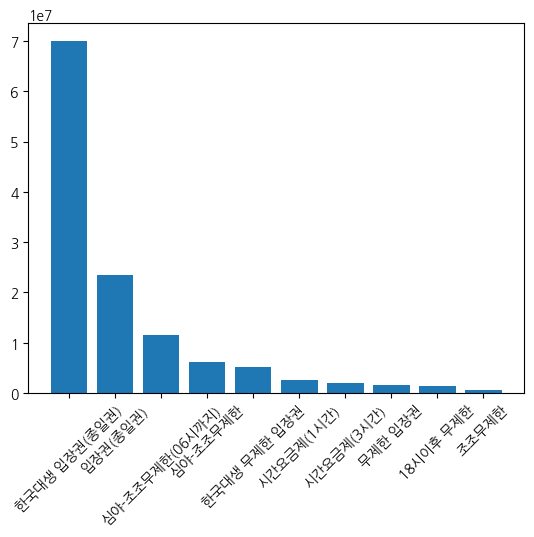

In [104]:
plt.bar(d['요금제명'].head(10), d['금액'].head(10))
plt.xticks(rotation=45)
plt.show()

## 내가 정의한 문제 해결하기

비용에 대한 항목이 없는게 아쉽다.. ㅠㅠ 경영이란 한정된 자원에서 최대한의 효율을 끌어올리는 것이 중요한데.. 비용값을 알 수 없으니.. 효율성을 따질 수가 없다.. ㅠㅠ


하여.. 상식적인 수준?에서 문제를 정의하고 해결해보겠다.

### 문제: 악성 재고 및 악성 데이터

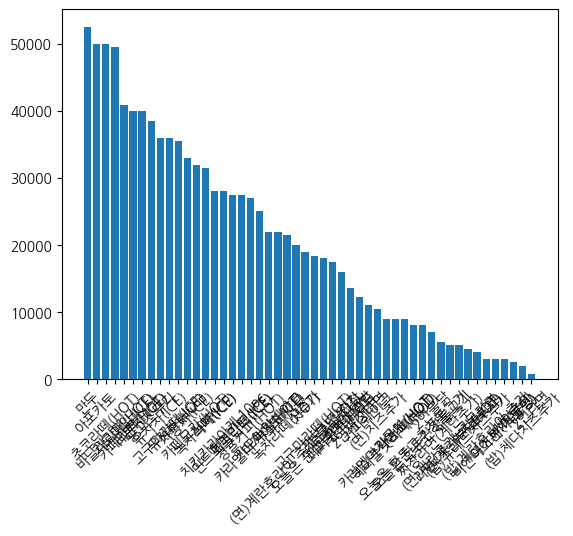

In [110]:
plt.bar(c['상품명'].tail(50), c['결제금액'].tail(50))
plt.xticks(rotation=45)
plt.show()

### 해결책: 

> 상위 10개의 종목을 제외하고, 모든 상품의 판매를 중지한다.

재고는 곧 비용이다.

해당 기간동안 100만원의 수익도 얻지 못한 항목들이 정말 많다.

100만원 이하 상품의 경우 메뉴판에서 제외시키면, 재고부담을 획기적으로 줄일 수 있다.



> 중복된 요금제를 통일한다.

같은 이름에 다양한 가격대의 요금제가 섞여있다. 요금제를 통일해야한다. 이벤트 기간에 따른 할인이라면 따로 메뉴를 만들어 본 가격과 구분지어야 한다. 정갈한 데이터를 얻어야 제대로 된 피드백이 가능하다.

> 기타

학기와 방학에 따른 심야시간 이용자를 측정해볼 수 있다면.. ?! 좋겠으나.. 데이터가 못미더워서 하기 싫다.. ㅠㅠ